In [1]:
import librosa # https://librosa.org/doc/latest/tutorial.html
import math as m
import numpy as np
import IPython.display as idisplay
import matplotlib.pyplot as plt

import scipy
import scipy.constants
sic = scipy.constants
import scipy.signal as signal

from pydub import AudioSegment
from scipy.io.wavfile import read as readwave

%precision %.5f 
np.set_printoptions(suppress=True, 
                    formatter={'float_kind':'{:10.4f}'.format})  
%matplotlib inline

In [2]:
waveform, sr = librosa.load("maryhadalittleRAM.aiff", sr=None, mono=True)
#waveform.shape
waveform = waveform * .5
print(waveform.shape, sr)
print(max(waveform), min(waveform))
idisplay.display(idisplay.Audio(waveform, rate=sr, normalize=False))

(74240,) 44100
0.12890625 -0.10546875


Samples: 74240, Sample Rate: 44100hz, Recording Length: 1.683s, dt/Sample Length: 22.676μs


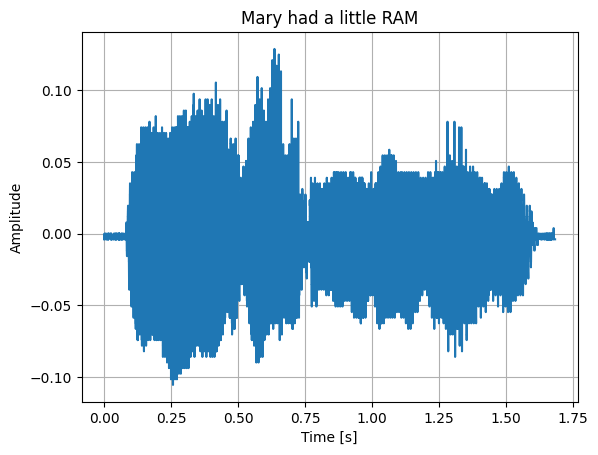

In [3]:
#t, y = sig.step(lti)
ns = len(waveform) # number of samples
stime = ns / sr # sample time
dt = stime/ns

t = np.linspace(0, stime, ns)

print(f"Samples: {ns}, Sample Rate: {sr}hz, Recording Length: {stime:0.3f}s, dt/Sample Length: {dt*1e6:0.3f}μs")
plt.plot(t, waveform)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Mary had a little RAM')
plt.grid()

In [4]:
librosa.note_to_hz("A4")

440.00000

In [5]:
librosa.note_to_hz("d5")

587.32954

In [6]:
np.mean(np.diff(t))

0.00002

x(t) = x0 + A cos(ωt + φ)

The period T is the time it takes the object to complete one oscillation and return to the starting position.  The angular frequency ω is given by ω = 2π/T.  The angular frequency is measured in radians per second.  The inverse of the period is the frequency f = 1/T.

http://labman.phys.utk.edu/phys135core/modules/m9/harmonic_motion.html

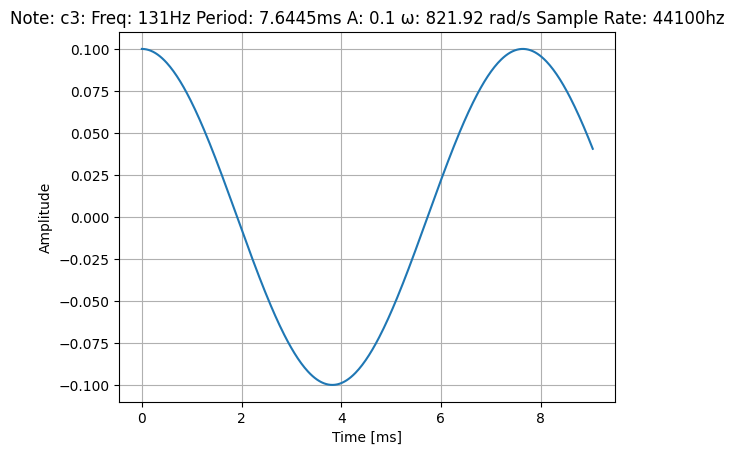

In [7]:
nplot = 400
notename = "c3"
f = librosa.note_to_hz(notename) # hz
#f = 440
#f = f*1000 # kHz
period = 1/f
ω = (2*m.pi)/period
a = 0.1
wf_d5 = a*np.cos(ω*t)

idisplay.display(idisplay.Audio(wf_d5, rate=sr, normalize=False))

plt.plot(t[:nplot]*1000, wf_d5[:nplot])
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title(f"Note: {notename}: Freq: {f:0.0f}Hz Period: {period*1e3:0.5}ms A: {a:0.3} ω: {ω:0.5} rad/s Sample Rate: {sr}hz")
plt.grid()



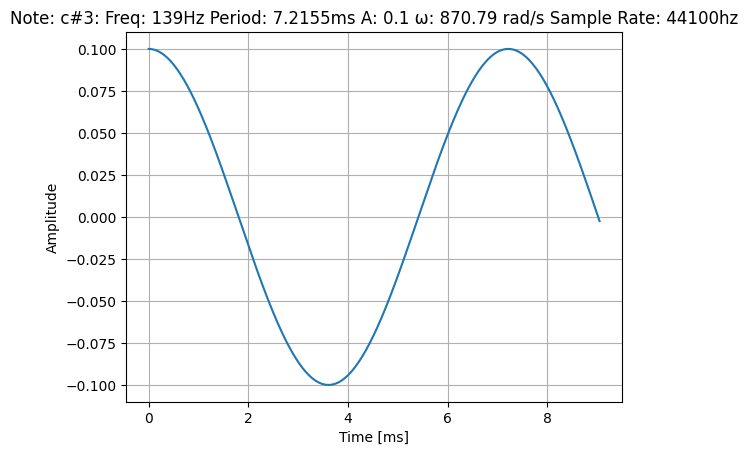

In [8]:
notename = "c#3"
f = librosa.note_to_hz(notename) # hz
#f = 440
#f = f*1000 # kHz
period = 1/f
ω = (2*m.pi)/period
a = 0.1
wf_A4 = a*np.cos(ω*t)

idisplay.display(idisplay.Audio(wf_A4, rate=sr, normalize=False))

plt.plot(t[:nplot]*1000, wf_A4[:nplot])
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title(f"Note: {notename}: Freq: {f:0.0f}Hz Period: {period*1e3:0.5}ms A: {a:0.3} ω: {ω:0.5} rad/s Sample Rate: {sr}hz")
plt.grid()

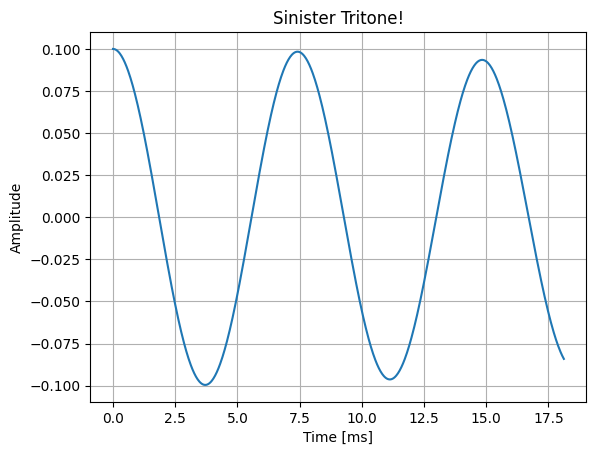

In [9]:
#https://en.wikipedia.org/wiki/Tritone
wf_P8 = (wf_A4 + wf_d5)/2
nplot = 800
idisplay.display(idisplay.Audio(wf_P8, rate=sr, normalize=False))

plt.plot(t[:nplot]*1000, wf_P8[:nplot])
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title(f"Sinister Tritone!")
plt.grid()

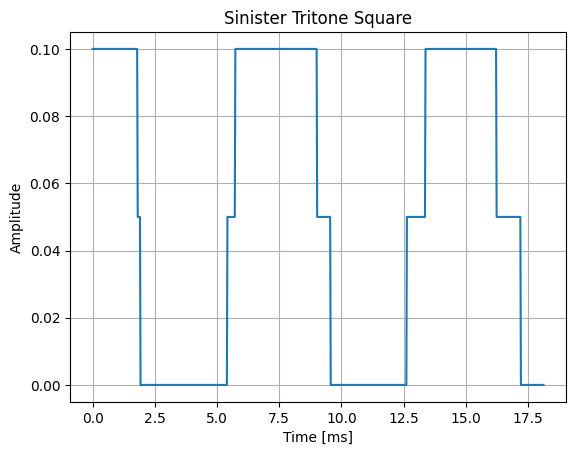

In [10]:
wf_A4s = a*np.array([(s>0) for s in wf_A4]) 
wf_d5s = a*np.array([(s>0) for s in wf_d5]) 
wf_P8s = (wf_A4s + wf_d5s)/2



idisplay.display(idisplay.Audio(wf_P8s, rate=sr, normalize=False))

plt.plot(t[:nplot]*1000, wf_P8s[:nplot])
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title(f"Sinister Tritone Square")
plt.grid()

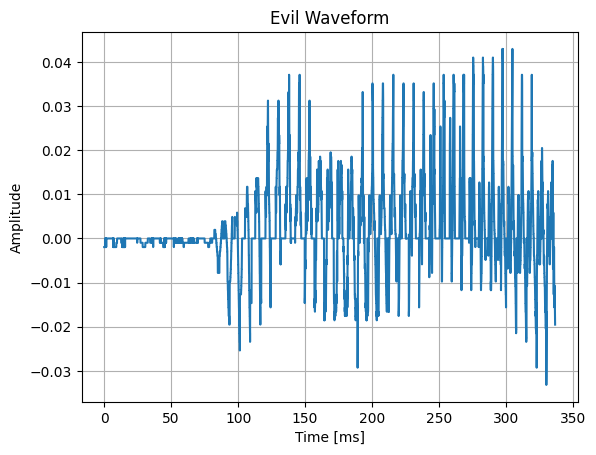

In [11]:
evil_waveform = (waveform * (wf_P8s*5))
idisplay.display(idisplay.Audio(evil_waveform, rate=sr, normalize=False))

nplot = int(ns/5)
plt.plot(t[:nplot]*1000, evil_waveform[:nplot])
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title(f"Evil Waveform")
plt.grid()

Now we can design the low-pass filter to cut off frequencies greater than 2.5 Hz.
By default, the iirfilter function returns the coefficients of the difference
equation $b_i$ and $a_i$, which can be passed to a filter function. The next
post will deal with a different output format.
I am choosing a filter order of 4 (first argument). The Butterworth filter
type is the default choice, but it is better to be explicit.
We can apply the designed filter on the noisy signal by calling the lfilter
function.

[    0.0000     0.0002     0.0003     0.0002     0.0000]
[    1.0000    -3.5535     4.7575    -2.8426     0.6393]


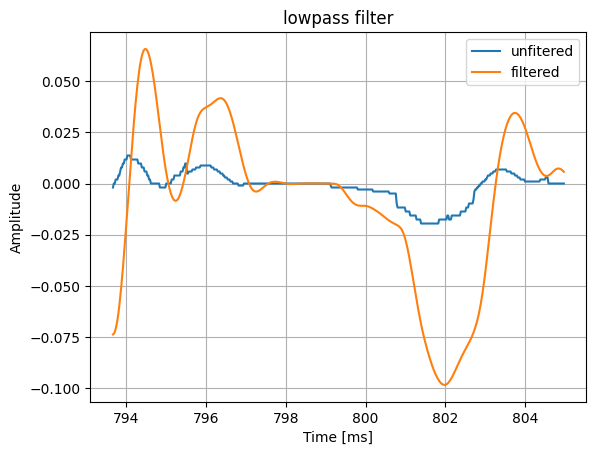

In [12]:
# https://www.samproell.io/posts/yarppg/digital-filters-python/

b, a = scipy.signal.iirfilter(4, Wn=1200, fs=sr, btype="low", ftype="butter")
print(b, a, sep="\n")

y_lfilter = 5*scipy.signal.lfilter(b, a, evil_waveform)

idisplay.display(idisplay.Audio(y_lfilter, rate=sr, normalize=False))

#nplot = int(ns/5)
nplot = slice(35000, 35500)

plt.plot(t[nplot]*1000, evil_waveform[nplot], label="unfitered")
plt.plot(t[nplot]*1000, y_lfilter[nplot], label="filtered")
plt.xlabel('Time [ms]')
plt.ylabel('Amplitude')
plt.title(f"lowpass filter")
plt.legend()
plt.grid()

In [13]:
help(AudioSegment.from_raw)

Help on method from_raw in module pydub.audio_segment:

from_raw(file, **kwargs) method of builtins.type instance



In [14]:
#song = AudioSegment.from_file("/path/to/file.mp3", format="mp3")
#song.export("/path/to/new/filename.mp4", format="mp4")
#https://stackoverflow.com/questions/35735497/how-to-create-a-pydub-audiosegment-using-an-numpy-array
#waveform.tobytes()

wf_P8s_16 = (wf_P8s*(2**15)-1).astype('int16')
audio_segment = AudioSegment(
    wf_P8s_16.tobytes(), 
    frame_rate=sr,
    sample_width=wf_P8s_16.dtype.itemsize, 
    channels=1
)

audio_segment.export("P8s.aiff", format="aiff")

<_io.BufferedRandom name='P8s.aiff'>

In [15]:
wf_P8s.dtype.itemsize

8

In [16]:
rate, signal = readwave("maryhadalittleRAM.wav")
rate, signal.shape, signal.dtype
#channel1 = signal[:,0]


(44100, (74240,), dtype('int16'))

In [17]:
max(signal), min(signal)

(8619, -6731)

In [18]:
2**15-1

32767

In [19]:
#(wf_P8s*(2**15)-1).astype('int16').tobytes()

In [20]:
librosa.note_to_hz("c#0")

17.32391

In [21]:
help(librosa.note_to_hz)

Help on function note_to_hz in module librosa.core.convert:

note_to_hz(note: 'Union[str, _IterableLike[str], Iterable[str]]', **kwargs: 'Any') -> 'Union[np.floating[Any], np.ndarray]'
    Convert one or more note names to frequency (Hz)
    
    Examples
    --------
    >>> # Get the frequency of a note
    >>> librosa.note_to_hz('C')
    array([ 16.352])
    >>> # Or multiple notes
    >>> librosa.note_to_hz(['A3', 'A4', 'A5'])
    array([ 220.,  440.,  880.])
    >>> # Or notes with tuning deviations
    >>> librosa.note_to_hz('C2-32', round_midi=False)
    array([ 64.209])
    
    Parameters
    ----------
    note : str or iterable of str
        One or more note names to convert
    **kwargs : additional keyword arguments
        Additional parameters to `note_to_midi`
    
    Returns
    -------
    frequencies : number or np.ndarray [shape=(len(note),)]
        Array of frequencies (in Hz) corresponding to ``note``
    
    See Also
    --------
    midi_to_hz
    note_to_mi